In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten, Activation, PReLU
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.metrics import MeanSquaredLogarithmicError, MeanAbsolutePercentageError, RootMeanSquaredError

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
%%time
cat = [f'col_{i}' for i in range(1, 117)]
con = [f'col_{i}' for i in range(117, 131)]
for c in cat:
    train_df[c] = train_df[c].astype('category')
    test_df[c] = test_df[c].astype('category')
    train_df[c] = train_df[c].cat.codes
    test_df[c] = test_df[c].cat.codes
del c
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

# train_df['target'] = train_df['target'].apply(lambda x: np.log10(x))

Wall time: 11.4 s


In [4]:
X = train_df.iloc[:,train_df.columns != 'target'].values
y = train_df.iloc[:,train_df.columns == 'target'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
del X, y

In [6]:
activation_fn = 'relu'
model = Sequential()
# Input Layer
model.add(Input(shape=(130,)))

# First Hidden Layer
model.add(Dense(130, activation=activation_fn))

# Second Hidden Layer
model.add(Dense(260, activation=activation_fn))
model.add(Dropout(.2))

# Third Hidden Layer
model.add(Dense(130, activation=activation_fn))
model.add(Dropout(.2))

# Fourth Hidden Layer
model.add(Dense(65, activation=activation_fn))
model.add(Dropout(.1))

# Output Layer
model.add(Dense(1, activation=linear))
model.compile(optimizer=RMSprop(learning_rate=1e-3), loss='msle', metrics=['msle', 'mape', RootMeanSquaredError(name='rmse'), 'mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 130)               17030     
_________________________________________________________________
dense_1 (Dense)              (None, 260)               34060     
_________________________________________________________________
dropout (Dropout)            (None, 260)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 130)               33930     
_________________________________________________________________
dropout_1 (Dropout)          (None, 130)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 65)                8515      
_________________________________________________________________
dropout_2 (Dropout)          (None, 65)                0

In [7]:
msle_history = []
mse_history = []
mae_history = []
rmse_history = []
mape_history = []

In [8]:
%%time
init_epochs = 0
epochs_now = 100
folder = 'final_wo'
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
msle_history += history.history['msle']
mse_history += history.history['mse']
mae_history += history.history['mae']
rmse_history += history.history['rmse']
mape_history += history.history['mape']
model.save(f'{folder}/model_{epochs_now}.h5')

Epoch 1/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.4909 - msle: 0.4909 - mape: 63.6982 - rmse: 2423.2085 - mae: 1423.4385 - mse: 5871939.5000 - val_loss: 0.3357 - val_msle: 0.3357 - val_mape: 52.5237 - val_rmse: 2261.0317 - val_mae: 1266.5577 - val_mse: 5112264.5000
Epoch 2/100
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3658 - msle: 0.3658 - mape: 58.0659 - rmse: 2208.1501 - mae: 1306.5774 - mse: 4875927.0000 - val_loss: 0.3267 - val_msle: 0.3267 - val_mape: 53.1366 - val_rmse: 2172.0081 - val_mae: 1233.5492 - val_mse: 4717618.5000
Epoch 3/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.3557 - msle: 0.3557 - mape: 57.4350 - rmse: 2165.3108 - mae: 1283.8108 - mse: 4688570.5000 - val_loss: 0.3312 - val_msle: 0.3312 - val_mape: 48.7638 - val_rmse: 2170.4448 - val_mae: 1231.3188 - val_mse: 4710831.0000
Epoch 4/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.3505 - msle: 0.3505 - mape: 57.2132 

Epoch 29/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.3279 - msle: 0.3279 - mape: 54.5696 - rmse: 2063.7109 - mae: 1223.0953 - mse: 4258902.5000 - val_loss: 0.3095 - val_msle: 0.3095 - val_mape: 52.6712 - val_rmse: 2072.1050 - val_mae: 1189.7893 - val_mse: 4293619.0000
Epoch 30/100
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3273 - msle: 0.3273 - mape: 53.6031 - rmse: 2055.5081 - mae: 1223.0919 - mse: 4225113.0000 - val_loss: 0.3183 - val_msle: 0.3183 - val_mape: 46.0456 - val_rmse: 2161.0618 - val_mae: 1213.9487 - val_mse: 4670187.5000
Epoch 31/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.3274 - msle: 0.3274 - mape: 54.1762 - rmse: 2064.6875 - mae: 1224.4070 - mse: 4262934.5000 - val_loss: 0.3460 - val_msle: 0.3460 - val_mape: 44.2327 - val_rmse: 2211.7244 - val_mae: 1250.2583 - val_mse: 4891724.5000
Epoch 32/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.3269 - msle: 0.3269 - mape: 54.2

Epoch 57/100
2980/2980 [==============================] - 8s 3ms/step - loss: 0.3205 - msle: 0.3205 - mape: 53.5627 - rmse: 2035.4380 - mae: 1208.4066 - mse: 4143008.0000 - val_loss: 0.3071 - val_msle: 0.3071 - val_mape: 48.3783 - val_rmse: 2155.3013 - val_mae: 1207.3604 - val_mse: 4645324.0000
Epoch 58/100
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3190 - msle: 0.3190 - mape: 53.2434 - rmse: 2028.2991 - mae: 1204.8612 - mse: 4113997.0000 - val_loss: 0.3058 - val_msle: 0.3058 - val_mape: 49.2102 - val_rmse: 2045.2434 - val_mae: 1179.5171 - val_mse: 4183020.5000
Epoch 59/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.3198 - msle: 0.3198 - mape: 53.3000 - rmse: 2036.8226 - mae: 1208.1127 - mse: 4148646.2500 - val_loss: 0.3161 - val_msle: 0.3161 - val_mape: 55.8519 - val_rmse: 2011.5750 - val_mae: 1195.6962 - val_mse: 4046433.7500
Epoch 60/100
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3197 - msle: 0.3197 - mape: 53.5

Epoch 85/100
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3146 - msle: 0.3146 - mape: 52.7031 - rmse: 2007.8632 - mae: 1195.3624 - mse: 4031514.5000 - val_loss: 0.3588 - val_msle: 0.3588 - val_mape: 43.5091 - val_rmse: 2291.8518 - val_mae: 1283.4032 - val_mse: 5252584.5000
Epoch 86/100
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3142 - msle: 0.3142 - mape: 52.6861 - rmse: 2012.8331 - mae: 1197.4242 - mse: 4051497.0000 - val_loss: 0.3154 - val_msle: 0.3154 - val_mape: 46.4851 - val_rmse: 2188.6443 - val_mae: 1221.4348 - val_mse: 4790163.5000
Epoch 87/100
2980/2980 [==============================] - 7s 2ms/step - loss: 0.3153 - msle: 0.3153 - mape: 53.0373 - rmse: 2017.3140 - mae: 1198.2594 - mse: 4069555.7500 - val_loss: 0.3046 - val_msle: 0.3046 - val_mape: 49.5146 - val_rmse: 2083.8486 - val_mae: 1187.2438 - val_mse: 4342425.0000
Epoch 88/100
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3140 - msle: 0.3140 - mape: 53.5

In [9]:
%%time
init_epochs = 100
epochs_now = 500
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
msle_history += history.history['msle']
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'{folder}/model_{epochs_now}.h5')

Epoch 101/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3136 - msle: 0.3136 - mape: 52.3669 - rmse: 2012.7944 - mae: 1193.9987 - mse: 4051341.2500 - val_loss: 0.3049 - val_msle: 0.3049 - val_mape: 48.6551 - val_rmse: 2077.8169 - val_mae: 1187.1285 - val_mse: 4317323.5000
Epoch 102/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3119 - msle: 0.3119 - mape: 52.1424 - rmse: 2008.5281 - mae: 1191.4805 - mse: 4034185.0000 - val_loss: 0.3674 - val_msle: 0.3674 - val_mape: 69.2489 - val_rmse: 2033.8156 - val_mae: 1297.9152 - val_mse: 4136405.7500
Epoch 103/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3128 - msle: 0.3128 - mape: 52.8393 - rmse: 2010.5676 - mae: 1191.9580 - mse: 4042382.0000 - val_loss: 0.3058 - val_msle: 0.3058 - val_mape: 51.9349 - val_rmse: 2006.7261 - val_mae: 1176.3969 - val_mse: 4026949.5000
Epoch 104/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3123 - msle: 0.3123 - mape: 

2980/2980 [==============================] - 6s 2ms/step - loss: 0.3091 - msle: 0.3091 - mape: 52.6765 - rmse: 1999.4913 - mae: 1185.1521 - mse: 3997965.7500 - val_loss: 0.3518 - val_msle: 0.3518 - val_mape: 65.7936 - val_rmse: 2001.2478 - val_mae: 1250.3969 - val_mse: 4004992.7500
Epoch 129/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3088 - msle: 0.3088 - mape: 51.9256 - rmse: 1994.3029 - mae: 1184.0938 - mse: 3977243.7500 - val_loss: 0.3221 - val_msle: 0.3221 - val_mape: 45.5093 - val_rmse: 2166.3914 - val_mae: 1220.9622 - val_mse: 4693251.0000
Epoch 130/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3095 - msle: 0.3095 - mape: 51.8072 - rmse: 1998.4996 - mae: 1185.4985 - mse: 3994001.0000 - val_loss: 0.3759 - val_msle: 0.3759 - val_mape: 70.7225 - val_rmse: 2039.6987 - val_mae: 1311.8368 - val_mse: 4160370.7500
Epoch 131/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3086 - msle: 0.3086 - mape: 51.9534 - rmse

Epoch 156/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3059 - msle: 0.3059 - mape: 51.6311 - rmse: 1989.9531 - mae: 1178.5724 - mse: 3959913.2500 - val_loss: 0.3193 - val_msle: 0.3193 - val_mape: 57.1995 - val_rmse: 2002.6447 - val_mae: 1199.0640 - val_mse: 4010585.5000
Epoch 157/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3062 - msle: 0.3062 - mape: 51.5446 - rmse: 1989.2743 - mae: 1180.0850 - mse: 3957212.0000 - val_loss: 0.3314 - val_msle: 0.3314 - val_mape: 61.0762 - val_rmse: 2023.9694 - val_mae: 1233.8196 - val_mse: 4096451.7500
Epoch 158/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3053 - msle: 0.3053 - mape: 51.6914 - rmse: 1983.1631 - mae: 1176.9880 - mse: 3932935.7500 - val_loss: 0.3060 - val_msle: 0.3060 - val_mape: 49.3116 - val_rmse: 2043.3375 - val_mae: 1177.8794 - val_mse: 4175228.2500
Epoch 159/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3054 - msle: 0.3054 - mape: 

Epoch 184/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3008 - msle: 0.3008 - mape: 50.9228 - rmse: 1975.8357 - mae: 1167.9917 - mse: 3903926.5000 - val_loss: 0.3360 - val_msle: 0.3360 - val_mape: 45.3286 - val_rmse: 2195.5056 - val_mae: 1250.2539 - val_mse: 4820245.0000
Epoch 185/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3000 - msle: 0.3000 - mape: 50.8775 - rmse: 1969.7188 - mae: 1166.7804 - mse: 3879792.0000 - val_loss: 0.3338 - val_msle: 0.3338 - val_mape: 45.7079 - val_rmse: 2122.6392 - val_mae: 1224.9734 - val_mse: 4505596.5000
Epoch 186/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3001 - msle: 0.3001 - mape: 50.7661 - rmse: 1971.2126 - mae: 1166.4780 - mse: 3885679.2500 - val_loss: 0.3379 - val_msle: 0.3379 - val_mape: 44.6909 - val_rmse: 2198.6687 - val_mae: 1246.4406 - val_mse: 4834144.0000
Epoch 187/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.3002 - msle: 0.3002 - mape: 

Epoch 212/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2972 - msle: 0.2972 - mape: 50.9756 - rmse: 1957.1887 - mae: 1157.8824 - mse: 3830587.5000 - val_loss: 0.3381 - val_msle: 0.3381 - val_mape: 45.0702 - val_rmse: 2169.8804 - val_mae: 1240.2651 - val_mse: 4708380.5000
Epoch 213/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2967 - msle: 0.2967 - mape: 50.9791 - rmse: 1958.8052 - mae: 1159.7032 - mse: 3836917.7500 - val_loss: 0.3090 - val_msle: 0.3090 - val_mape: 48.5179 - val_rmse: 2067.3093 - val_mae: 1185.3683 - val_mse: 4273768.0000
Epoch 214/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2970 - msle: 0.2970 - mape: 50.7706 - rmse: 1958.6368 - mae: 1158.1691 - mse: 3836258.5000 - val_loss: 0.3089 - val_msle: 0.3089 - val_mape: 51.9161 - val_rmse: 2039.1772 - val_mae: 1184.3494 - val_mse: 4158244.0000
Epoch 215/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2963 - msle: 0.2963 - mape: 

Epoch 240/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2931 - msle: 0.2931 - mape: 50.1714 - rmse: 1945.6051 - mae: 1150.5131 - mse: 3785379.0000 - val_loss: 0.4075 - val_msle: 0.4075 - val_mape: 43.6299 - val_rmse: 2385.4231 - val_mae: 1367.9447 - val_mse: 5690243.0000
Epoch 241/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2933 - msle: 0.2933 - mape: 50.1559 - rmse: 1945.0140 - mae: 1150.7040 - mse: 3783079.7500 - val_loss: 0.3101 - val_msle: 0.3101 - val_mape: 48.1799 - val_rmse: 2084.3330 - val_mae: 1192.8076 - val_mse: 4344444.0000
Epoch 242/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2930 - msle: 0.2930 - mape: 50.2913 - rmse: 1949.0826 - mae: 1152.5481 - mse: 3798923.0000 - val_loss: 0.3764 - val_msle: 0.3764 - val_mape: 43.9239 - val_rmse: 2291.0330 - val_mae: 1308.2006 - val_mse: 5248832.5000
Epoch 243/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2931 - msle: 0.2931 - mape: 

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2918 - msle: 0.2918 - mape: 50.1034 - rmse: 1942.1317 - mae: 1147.2230 - mse: 3771875.5000 - val_loss: 0.3412 - val_msle: 0.3412 - val_mape: 45.1350 - val_rmse: 2170.3149 - val_mae: 1243.0521 - val_mse: 4710267.0000
Epoch 268/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2906 - msle: 0.2906 - mape: 50.3359 - rmse: 1935.6447 - mae: 1144.2104 - mse: 3746720.0000 - val_loss: 0.3237 - val_msle: 0.3237 - val_mape: 46.4909 - val_rmse: 2122.9407 - val_mae: 1222.8882 - val_mse: 4506877.0000
Epoch 269/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2906 - msle: 0.2906 - mape: 50.1423 - rmse: 1931.5847 - mae: 1145.3191 - mse: 3731019.7500 - val_loss: 0.4754 - val_msle: 0.4754 - val_mape: 44.6437 - val_rmse: 2526.7375 - val_mae: 1471.7330 - val_mse: 6384402.5000
Epoch 270/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2900 - msle: 0.2900 - mape: 50.2741 - rmse

Epoch 295/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2880 - msle: 0.2880 - mape: 50.0416 - rmse: 1932.0731 - mae: 1138.6145 - mse: 3732906.7500 - val_loss: 0.3655 - val_msle: 0.3655 - val_mape: 44.6480 - val_rmse: 2223.5869 - val_mae: 1275.4980 - val_mse: 4944338.5000
Epoch 296/500
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2880 - msle: 0.2880 - mape: 49.8981 - rmse: 1934.0156 - mae: 1139.4952 - mse: 3740416.5000 - val_loss: 0.3293 - val_msle: 0.3293 - val_mape: 45.6072 - val_rmse: 2167.5569 - val_mae: 1234.2036 - val_mse: 4698302.5000
Epoch 297/500
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2881 - msle: 0.2881 - mape: 49.4941 - rmse: 1930.4067 - mae: 1139.8427 - mse: 3726470.0000 - val_loss: 0.3241 - val_msle: 0.3241 - val_mape: 46.9097 - val_rmse: 2122.4087 - val_mae: 1219.9222 - val_mse: 4504619.0000
Epoch 298/500
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2889 - msle: 0.2889 - mape: 

Epoch 323/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2870 - msle: 0.2870 - mape: 49.6942 - rmse: 1928.2709 - mae: 1138.5232 - mse: 3718228.7500 - val_loss: 0.3896 - val_msle: 0.3896 - val_mape: 44.1858 - val_rmse: 2290.8777 - val_mae: 1323.3939 - val_mse: 5248121.0000
Epoch 324/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2855 - msle: 0.2855 - mape: 49.3973 - rmse: 1918.4427 - mae: 1134.2296 - mse: 3680422.7500 - val_loss: 0.3265 - val_msle: 0.3265 - val_mape: 47.3533 - val_rmse: 2104.7061 - val_mae: 1214.4884 - val_mse: 4429787.5000
Epoch 325/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2863 - msle: 0.2863 - mape: 49.6128 - rmse: 1920.7849 - mae: 1134.5582 - mse: 3689414.5000 - val_loss: 0.3491 - val_msle: 0.3491 - val_mape: 44.6399 - val_rmse: 2225.9221 - val_mae: 1268.7581 - val_mse: 4954729.0000
Epoch 326/500
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2866 - msle: 0.2866 - mape: 

Epoch 351/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2846 - msle: 0.2846 - mape: 49.3976 - rmse: 1915.9320 - mae: 1132.3036 - mse: 3670795.5000 - val_loss: 0.3510 - val_msle: 0.3510 - val_mape: 44.9870 - val_rmse: 2248.1765 - val_mae: 1280.2697 - val_mse: 5054298.0000
Epoch 352/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2846 - msle: 0.2846 - mape: 49.2233 - rmse: 1920.0081 - mae: 1133.3323 - mse: 3686430.7500 - val_loss: 0.3332 - val_msle: 0.3332 - val_mape: 46.1216 - val_rmse: 2148.1084 - val_mae: 1233.1091 - val_mse: 4614370.0000
Epoch 353/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2849 - msle: 0.2849 - mape: 49.3972 - rmse: 1922.1372 - mae: 1133.0106 - mse: 3694611.2500 - val_loss: 0.3338 - val_msle: 0.3338 - val_mape: 45.5158 - val_rmse: 2150.9045 - val_mae: 1234.4751 - val_mse: 4626390.0000
Epoch 354/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2848 - msle: 0.2848 - mape: 

Epoch 379/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2835 - msle: 0.2835 - mape: 49.6720 - rmse: 1908.3173 - mae: 1129.2915 - mse: 3641675.0000 - val_loss: 0.3931 - val_msle: 0.3931 - val_mape: 44.3045 - val_rmse: 2381.9915 - val_mae: 1360.6083 - val_mse: 5673883.5000
Epoch 380/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2830 - msle: 0.2830 - mape: 49.2474 - rmse: 1912.3116 - mae: 1128.2323 - mse: 3656936.0000 - val_loss: 0.3259 - val_msle: 0.3259 - val_mape: 46.1639 - val_rmse: 2147.7729 - val_mae: 1226.8009 - val_mse: 4612928.5000
Epoch 381/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2829 - msle: 0.2829 - mape: 49.2360 - rmse: 1911.3043 - mae: 1128.3208 - mse: 3653084.0000 - val_loss: 0.3255 - val_msle: 0.3255 - val_mape: 49.5516 - val_rmse: 2076.4429 - val_mae: 1213.5533 - val_mse: 4311615.0000
Epoch 382/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2831 - msle: 0.2831 - mape: 

Epoch 407/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2822 - msle: 0.2822 - mape: 48.8984 - rmse: 1909.0345 - mae: 1126.4504 - mse: 3644413.0000 - val_loss: 0.4121 - val_msle: 0.4121 - val_mape: 44.3025 - val_rmse: 2355.7441 - val_mae: 1360.9945 - val_mse: 5549531.0000
Epoch 408/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2815 - msle: 0.2815 - mape: 48.9876 - rmse: 1908.1676 - mae: 1123.3448 - mse: 3641103.5000 - val_loss: 0.3511 - val_msle: 0.3511 - val_mape: 45.6722 - val_rmse: 2181.1145 - val_mae: 1261.2549 - val_mse: 4757260.0000
Epoch 409/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2822 - msle: 0.2822 - mape: 48.9551 - rmse: 1911.4022 - mae: 1126.6237 - mse: 3653458.2500 - val_loss: 0.3793 - val_msle: 0.3793 - val_mape: 43.9339 - val_rmse: 2323.5095 - val_mae: 1316.4133 - val_mse: 5398696.0000
Epoch 410/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2818 - msle: 0.2818 - mape: 

Epoch 435/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2803 - msle: 0.2803 - mape: 49.1284 - rmse: 1913.7805 - mae: 1124.1775 - mse: 3662556.0000 - val_loss: 0.5294 - val_msle: 0.5294 - val_mape: 45.7694 - val_rmse: 2558.8931 - val_mae: 1507.4351 - val_mse: 6547934.0000
Epoch 436/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2799 - msle: 0.2799 - mape: 49.3302 - rmse: 1894.7123 - mae: 1119.3538 - mse: 3589934.7500 - val_loss: 0.3249 - val_msle: 0.3249 - val_mape: 48.2274 - val_rmse: 2108.0601 - val_mae: 1220.2955 - val_mse: 4443917.0000
Epoch 437/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2799 - msle: 0.2799 - mape: 49.0223 - rmse: 1899.4081 - mae: 1119.5891 - mse: 3607751.2500 - val_loss: 0.4884 - val_msle: 0.4884 - val_mape: 45.0969 - val_rmse: 2436.3813 - val_mae: 1442.0055 - val_mse: 5935953.5000
Epoch 438/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2795 - msle: 0.2795 - mape: 

Epoch 463/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2779 - msle: 0.2779 - mape: 48.9822 - rmse: 1889.4891 - mae: 1118.7092 - mse: 3570169.0000 - val_loss: 0.3480 - val_msle: 0.3480 - val_mape: 45.1753 - val_rmse: 2198.2571 - val_mae: 1259.8546 - val_mse: 4832334.5000
Epoch 464/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2780 - msle: 0.2780 - mape: 48.7659 - rmse: 1892.6892 - mae: 1119.1625 - mse: 3582272.5000 - val_loss: 0.4337 - val_msle: 0.4337 - val_mape: 44.3263 - val_rmse: 2396.3008 - val_mae: 1385.6572 - val_mse: 5742257.0000
Epoch 465/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2786 - msle: 0.2786 - mape: 48.5473 - rmse: 1897.4757 - mae: 1119.3615 - mse: 3600414.2500 - val_loss: 0.3608 - val_msle: 0.3608 - val_mape: 45.4368 - val_rmse: 2179.6155 - val_mae: 1262.9116 - val_mse: 4750724.0000
Epoch 466/500
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2791 - msle: 0.2791 - mape: 

Epoch 491/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2773 - msle: 0.2773 - mape: 48.6341 - rmse: 1887.6342 - mae: 1115.6501 - mse: 3563162.7500 - val_loss: 0.3421 - val_msle: 0.3421 - val_mape: 45.6198 - val_rmse: 2244.1128 - val_mae: 1270.3406 - val_mse: 5036042.0000
Epoch 492/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2773 - msle: 0.2773 - mape: 48.5921 - rmse: 1897.2727 - mae: 1116.8256 - mse: 3599643.5000 - val_loss: 0.4347 - val_msle: 0.4347 - val_mape: 44.3234 - val_rmse: 2392.2925 - val_mae: 1391.3341 - val_mse: 5723063.5000
Epoch 493/500
2980/2980 [==============================] - 7s 3ms/step - loss: 0.2771 - msle: 0.2771 - mape: 48.4449 - rmse: 1900.2379 - mae: 1116.9751 - mse: 3610904.2500 - val_loss: 0.3372 - val_msle: 0.3372 - val_mape: 46.7458 - val_rmse: 2156.1035 - val_mae: 1240.9752 - val_mse: 4648782.0000
Epoch 494/500
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2777 - msle: 0.2777 - mape: 

In [10]:
%%time
init_epochs = 500
epochs_now = 1000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
msle_history += history.history['msle']
mse_history += history.history['mse']
mae_history += history.history['mae']
rmse_history += history.history['rmse']
mape_history += history.history['mape']
model.save(f'{folder}/model_{epochs_now}.h5')

Epoch 501/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2766 - msle: 0.2766 - mape: 48.3892 - rmse: 1890.5973 - mae: 1113.5084 - mse: 3574358.2500 - val_loss: 0.4376 - val_msle: 0.4376 - val_mape: 44.6336 - val_rmse: 2428.3430 - val_mae: 1402.5713 - val_mse: 5896849.5000
Epoch 502/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 0.2765 - msle: 0.2765 - mape: 48.0323 - rmse: 1892.2747 - mae: 1114.6086 - mse: 3580703.2500 - val_loss: 0.3208 - val_msle: 0.3208 - val_mape: 50.3972 - val_rmse: 2071.1599 - val_mae: 1209.0646 - val_mse: 4289703.5000
Epoch 503/1000
2980/2980 [==============================] - 11s 4ms/step - loss: 0.2767 - msle: 0.2767 - mape: 48.6009 - rmse: 1885.2833 - mae: 1114.8418 - mse: 3554293.2500 - val_loss: 0.3248 - val_msle: 0.3248 - val_mape: 48.2328 - val_rmse: 2105.6519 - val_mae: 1221.5734 - val_mse: 4433770.0000
Epoch 504/1000
2980/2980 [==============================] - 12s 4ms/step - loss: 0.2769 - msle: 0.2769 - 

2980/2980 [==============================] - 7s 2ms/step - loss: 0.2758 - msle: 0.2758 - mape: 48.5768 - rmse: 1883.9182 - mae: 1111.6901 - mse: 3549147.7500 - val_loss: 0.3856 - val_msle: 0.3856 - val_mape: 44.7510 - val_rmse: 2294.9270 - val_mae: 1321.1805 - val_mse: 5266690.0000
Epoch 529/1000
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2761 - msle: 0.2761 - mape: 48.2631 - rmse: 1878.4585 - mae: 1109.3567 - mse: 3528606.5000 - val_loss: 0.4590 - val_msle: 0.4590 - val_mape: 45.1380 - val_rmse: 2482.7080 - val_mae: 1436.7091 - val_mse: 6163838.5000
Epoch 530/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2758 - msle: 0.2758 - mape: 48.5703 - rmse: 1881.9080 - mae: 1112.5994 - mse: 3541577.5000 - val_loss: 0.3864 - val_msle: 0.3864 - val_mape: 44.7401 - val_rmse: 2278.7195 - val_mae: 1313.8007 - val_mse: 5192562.0000
Epoch 531/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2760 - msle: 0.2760 - mape: 48.1782 - r

2980/2980 [==============================] - 7s 2ms/step - loss: 0.2754 - msle: 0.2754 - mape: 48.2518 - rmse: 1885.6815 - mae: 1111.6840 - mse: 3555795.0000 - val_loss: 0.5008 - val_msle: 0.5008 - val_mape: 45.2522 - val_rmse: 2492.5569 - val_mae: 1467.6898 - val_mse: 6212840.0000
Epoch 556/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2741 - msle: 0.2741 - mape: 48.5648 - rmse: 1879.9673 - mae: 1108.9211 - mse: 3534277.0000 - val_loss: 0.4008 - val_msle: 0.4008 - val_mape: 44.6681 - val_rmse: 2289.9275 - val_mae: 1327.0619 - val_mse: 5243768.0000
Epoch 557/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2739 - msle: 0.2739 - mape: 48.4175 - rmse: 1881.1508 - mae: 1107.1187 - mse: 3538728.2500 - val_loss: 0.4041 - val_msle: 0.4041 - val_mape: 44.2419 - val_rmse: 2387.9067 - val_mae: 1365.0797 - val_mse: 5702099.0000
Epoch 558/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2746 - msle: 0.2746 - mape: 48.1617 - r

2980/2980 [==============================] - 7s 2ms/step - loss: 0.2738 - msle: 0.2738 - mape: 48.1114 - rmse: 1882.3853 - mae: 1107.7312 - mse: 3543374.2500 - val_loss: 0.4410 - val_msle: 0.4410 - val_mape: 44.2395 - val_rmse: 2437.2788 - val_mae: 1407.1539 - val_mse: 5940327.5000
Epoch 583/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2734 - msle: 0.2734 - mape: 47.8919 - rmse: 1879.2062 - mae: 1106.5219 - mse: 3531415.7500 - val_loss: 0.4413 - val_msle: 0.4413 - val_mape: 44.5237 - val_rmse: 2474.3872 - val_mae: 1425.9176 - val_mse: 6122592.5000
Epoch 584/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2733 - msle: 0.2733 - mape: 47.9035 - rmse: 1871.6206 - mae: 1105.6526 - mse: 3502963.7500 - val_loss: 0.5088 - val_msle: 0.5088 - val_mape: 45.1774 - val_rmse: 2574.6450 - val_mae: 1506.8738 - val_mse: 6628797.5000
Epoch 585/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2734 - msle: 0.2734 - mape: 48.1436 - r

2980/2980 [==============================] - 7s 2ms/step - loss: 0.2727 - msle: 0.2727 - mape: 47.7625 - rmse: 1881.7913 - mae: 1106.1547 - mse: 3541138.2500 - val_loss: 0.4517 - val_msle: 0.4517 - val_mape: 44.7894 - val_rmse: 2438.4595 - val_mae: 1418.3853 - val_mse: 5946085.0000
Epoch 610/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2728 - msle: 0.2728 - mape: 48.0311 - rmse: 1873.0181 - mae: 1104.9902 - mse: 3508196.7500 - val_loss: 0.4238 - val_msle: 0.4238 - val_mape: 44.4568 - val_rmse: 2411.5444 - val_mae: 1386.2968 - val_mse: 5815547.0000
Epoch 611/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2718 - msle: 0.2718 - mape: 47.6601 - rmse: 1867.5171 - mae: 1101.4625 - mse: 3487620.2500 - val_loss: 0.4128 - val_msle: 0.4128 - val_mape: 44.3835 - val_rmse: 2371.4807 - val_mae: 1358.7394 - val_mse: 5623921.0000
Epoch 612/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2724 - msle: 0.2724 - mape: 47.8816 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2721 - msle: 0.2721 - mape: 47.9037 - rmse: 1873.1317 - mae: 1103.4556 - mse: 3508622.5000 - val_loss: 0.4376 - val_msle: 0.4376 - val_mape: 44.6489 - val_rmse: 2437.2241 - val_mae: 1407.0471 - val_mse: 5940062.0000
Epoch 637/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2713 - msle: 0.2713 - mape: 47.8769 - rmse: 1870.3773 - mae: 1102.0477 - mse: 3498311.2500 - val_loss: 0.4794 - val_msle: 0.4794 - val_mape: 45.1397 - val_rmse: 2565.0728 - val_mae: 1488.0167 - val_mse: 6579598.5000
Epoch 638/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2720 - msle: 0.2720 - mape: 47.3717 - rmse: 1873.5061 - mae: 1104.1606 - mse: 3510025.2500 - val_loss: 0.4164 - val_msle: 0.4164 - val_mape: 44.3489 - val_rmse: 2404.8303 - val_mae: 1378.8800 - val_mse: 5783209.0000
Epoch 639/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2714 - msle: 0.2714 - mape: 47.8853 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2717 - msle: 0.2717 - mape: 47.7415 - rmse: 1870.7612 - mae: 1100.9385 - mse: 3499747.7500 - val_loss: 0.4554 - val_msle: 0.4554 - val_mape: 44.8675 - val_rmse: 2475.6257 - val_mae: 1434.9329 - val_mse: 6128723.0000
Epoch 664/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2709 - msle: 0.2709 - mape: 47.7435 - rmse: 1864.1838 - mae: 1097.4449 - mse: 3475181.5000 - val_loss: 0.4626 - val_msle: 0.4626 - val_mape: 44.7938 - val_rmse: 2479.5977 - val_mae: 1436.9171 - val_mse: 6148404.5000
Epoch 665/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2720 - msle: 0.2720 - mape: 47.8590 - rmse: 1876.2180 - mae: 1104.4796 - mse: 3520194.0000 - val_loss: 0.3601 - val_msle: 0.3601 - val_mape: 45.3109 - val_rmse: 2233.8599 - val_mae: 1284.3322 - val_mse: 4990129.5000
Epoch 666/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2706 - msle: 0.2706 - mape: 47.6121 - r

2980/2980 [==============================] - 7s 2ms/step - loss: 0.2702 - msle: 0.2702 - mape: 47.4246 - rmse: 1859.1073 - mae: 1098.2347 - mse: 3456279.7500 - val_loss: 0.3251 - val_msle: 0.3251 - val_mape: 49.9549 - val_rmse: 2095.3721 - val_mae: 1221.0822 - val_mse: 4390584.0000
Epoch 691/1000
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2694 - msle: 0.2694 - mape: 47.5380 - rmse: 1863.5453 - mae: 1096.5503 - mse: 3472801.0000 - val_loss: 0.4157 - val_msle: 0.4157 - val_mape: 44.5704 - val_rmse: 2350.6941 - val_mae: 1360.5195 - val_mse: 5525763.0000
Epoch 692/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2704 - msle: 0.2704 - mape: 47.7573 - rmse: 1866.2524 - mae: 1098.0356 - mse: 3482898.2500 - val_loss: 0.3515 - val_msle: 0.3515 - val_mape: 45.9621 - val_rmse: 2216.2874 - val_mae: 1264.1782 - val_mse: 4911929.5000
Epoch 693/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2705 - msle: 0.2705 - mape: 47.7315 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2692 - msle: 0.2692 - mape: 47.3716 - rmse: 1863.0526 - mae: 1096.6737 - mse: 3470965.2500 - val_loss: 0.3680 - val_msle: 0.3680 - val_mape: 45.1486 - val_rmse: 2272.7266 - val_mae: 1301.1819 - val_mse: 5165286.5000
Epoch 718/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2682 - msle: 0.2682 - mape: 47.2840 - rmse: 1853.3152 - mae: 1094.5194 - mse: 3434777.2500 - val_loss: 0.4163 - val_msle: 0.4163 - val_mape: 44.7827 - val_rmse: 2325.3508 - val_mae: 1347.3569 - val_mse: 5407256.5000
Epoch 719/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2684 - msle: 0.2684 - mape: 47.5326 - rmse: 1864.5494 - mae: 1095.6890 - mse: 3476544.7500 - val_loss: 0.3574 - val_msle: 0.3574 - val_mape: 45.2185 - val_rmse: 2225.4441 - val_mae: 1273.7609 - val_mse: 4952601.5000
Epoch 720/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2692 - msle: 0.2692 - mape: 47.9039 - r

2980/2980 [==============================] - 7s 2ms/step - loss: 0.2683 - msle: 0.2683 - mape: 47.3139 - rmse: 1856.6716 - mae: 1094.0569 - mse: 3447229.7500 - val_loss: 0.6213 - val_msle: 0.6213 - val_mape: 47.4464 - val_rmse: 2727.5527 - val_mae: 1624.5858 - val_mse: 7439544.0000
Epoch 745/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2673 - msle: 0.2673 - mape: 47.3082 - rmse: 1851.6051 - mae: 1091.4554 - mse: 3428441.5000 - val_loss: 0.3802 - val_msle: 0.3802 - val_mape: 45.4700 - val_rmse: 2242.3850 - val_mae: 1299.6783 - val_mse: 5028291.0000
Epoch 746/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2671 - msle: 0.2671 - mape: 47.0303 - rmse: 1853.4075 - mae: 1091.0046 - mse: 3435119.2500 - val_loss: 0.3825 - val_msle: 0.3825 - val_mape: 45.1836 - val_rmse: 2284.5598 - val_mae: 1318.7638 - val_mse: 5219214.0000
Epoch 747/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2671 - msle: 0.2671 - mape: 47.5886 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2668 - msle: 0.2668 - mape: 47.2030 - rmse: 1849.8093 - mae: 1089.7980 - mse: 3421794.5000 - val_loss: 0.3381 - val_msle: 0.3381 - val_mape: 47.8983 - val_rmse: 2180.4954 - val_mae: 1252.3505 - val_mse: 4754559.5000
Epoch 772/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2666 - msle: 0.2666 - mape: 47.1137 - rmse: 1853.6345 - mae: 1091.7219 - mse: 3435960.7500 - val_loss: 0.3741 - val_msle: 0.3741 - val_mape: 45.9722 - val_rmse: 2227.9631 - val_mae: 1293.9812 - val_mse: 4963819.5000
Epoch 773/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2668 - msle: 0.2668 - mape: 47.4131 - rmse: 1854.0779 - mae: 1090.3645 - mse: 3437605.0000 - val_loss: 0.3663 - val_msle: 0.3663 - val_mape: 45.1597 - val_rmse: 2269.2405 - val_mae: 1296.3625 - val_mse: 5149452.5000
Epoch 774/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2660 - msle: 0.2660 - mape: 47.0471 - r

2980/2980 [==============================] - 7s 2ms/step - loss: 0.2661 - msle: 0.2661 - mape: 47.1826 - rmse: 1854.4048 - mae: 1087.5594 - mse: 3438817.0000 - val_loss: 0.4835 - val_msle: 0.4835 - val_mape: 45.5135 - val_rmse: 2494.7981 - val_mae: 1459.3308 - val_mse: 6224017.0000
Epoch 799/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2660 - msle: 0.2660 - mape: 47.3839 - rmse: 1854.7316 - mae: 1089.2711 - mse: 3440029.2500 - val_loss: 0.4135 - val_msle: 0.4135 - val_mape: 44.7381 - val_rmse: 2355.3582 - val_mae: 1357.5947 - val_mse: 5547712.5000
Epoch 800/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2653 - msle: 0.2653 - mape: 47.1548 - rmse: 1837.2515 - mae: 1085.7703 - mse: 3375493.0000 - val_loss: 0.4809 - val_msle: 0.4809 - val_mape: 45.0914 - val_rmse: 2498.2327 - val_mae: 1450.6831 - val_mse: 6241167.0000
Epoch 801/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2659 - msle: 0.2659 - mape: 47.4647 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2638 - msle: 0.2638 - mape: 46.9152 - rmse: 1844.4242 - mae: 1085.3479 - mse: 3401900.7500 - val_loss: 0.4708 - val_msle: 0.4708 - val_mape: 45.1759 - val_rmse: 2497.7349 - val_mae: 1449.4573 - val_mse: 6238679.0000
Epoch 826/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2658 - msle: 0.2658 - mape: 46.8137 - rmse: 1845.7643 - mae: 1088.0037 - mse: 3406845.7500 - val_loss: 0.3534 - val_msle: 0.3534 - val_mape: 46.5637 - val_rmse: 2171.9202 - val_mae: 1256.3113 - val_mse: 4717237.0000
Epoch 827/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2646 - msle: 0.2646 - mape: 47.0301 - rmse: 1842.3463 - mae: 1085.3146 - mse: 3394240.0000 - val_loss: 0.3633 - val_msle: 0.3633 - val_mape: 46.1502 - val_rmse: 2239.1699 - val_mae: 1287.5968 - val_mse: 5013881.5000
Epoch 828/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2650 - msle: 0.2650 - mape: 47.4164 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2648 - msle: 0.2648 - mape: 47.1833 - rmse: 1840.8210 - mae: 1086.4973 - mse: 3388622.2500 - val_loss: 0.4192 - val_msle: 0.4192 - val_mape: 45.4295 - val_rmse: 2375.0933 - val_mae: 1372.2731 - val_mse: 5641067.5000
Epoch 853/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2631 - msle: 0.2631 - mape: 46.9278 - rmse: 1837.9777 - mae: 1082.9923 - mse: 3378162.0000 - val_loss: 0.5252 - val_msle: 0.5252 - val_mape: 45.5147 - val_rmse: 2581.4458 - val_mae: 1513.3582 - val_mse: 6663862.5000
Epoch 854/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2644 - msle: 0.2644 - mape: 46.8409 - rmse: 1844.3500 - mae: 1084.1251 - mse: 3401627.0000 - val_loss: 0.4217 - val_msle: 0.4217 - val_mape: 45.1140 - val_rmse: 2367.3496 - val_mae: 1368.3792 - val_mse: 5604344.0000
Epoch 855/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2632 - msle: 0.2632 - mape: 47.0821 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2630 - msle: 0.2630 - mape: 46.8034 - rmse: 1845.1215 - mae: 1082.8428 - mse: 3404473.0000 - val_loss: 0.3767 - val_msle: 0.3767 - val_mape: 45.5608 - val_rmse: 2272.7571 - val_mae: 1308.1954 - val_mse: 5165425.0000
Epoch 880/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2627 - msle: 0.2627 - mape: 47.0724 - rmse: 1834.7135 - mae: 1081.2463 - mse: 3366173.5000 - val_loss: 0.3462 - val_msle: 0.3462 - val_mape: 48.3950 - val_rmse: 2157.3381 - val_mae: 1252.5096 - val_mse: 4654107.5000
Epoch 881/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2631 - msle: 0.2631 - mape: 46.9317 - rmse: 1842.3530 - mae: 1082.0045 - mse: 3394264.7500 - val_loss: 0.4152 - val_msle: 0.4152 - val_mape: 44.9022 - val_rmse: 2342.3577 - val_mae: 1351.1942 - val_mse: 5486639.0000
Epoch 882/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2638 - msle: 0.2638 - mape: 46.7949 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2618 - msle: 0.2618 - mape: 46.5087 - rmse: 1830.3735 - mae: 1079.5004 - mse: 3350267.2500 - val_loss: 0.3549 - val_msle: 0.3549 - val_mape: 46.8590 - val_rmse: 2207.8872 - val_mae: 1267.9635 - val_mse: 4874765.5000
Epoch 907/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2626 - msle: 0.2626 - mape: 47.1434 - rmse: 1841.8146 - mae: 1082.5905 - mse: 3392281.0000 - val_loss: 0.3821 - val_msle: 0.3821 - val_mape: 45.3099 - val_rmse: 2323.9321 - val_mae: 1321.6267 - val_mse: 5400661.0000
Epoch 908/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2625 - msle: 0.2625 - mape: 47.2225 - rmse: 1838.4720 - mae: 1082.4171 - mse: 3379979.2500 - val_loss: 0.4332 - val_msle: 0.4332 - val_mape: 44.6525 - val_rmse: 2413.4346 - val_mae: 1392.1893 - val_mse: 5824666.0000
Epoch 909/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2631 - msle: 0.2631 - mape: 47.1259 - r

2980/2980 [==============================] - 10s 3ms/step - loss: 0.2614 - msle: 0.2614 - mape: 46.3506 - rmse: 1835.3496 - mae: 1077.8180 - mse: 3368508.0000 - val_loss: 0.3650 - val_msle: 0.3650 - val_mape: 46.2331 - val_rmse: 2256.7708 - val_mae: 1293.4189 - val_mse: 5093014.5000
Epoch 934/1000
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2612 - msle: 0.2612 - mape: 46.4245 - rmse: 1827.7904 - mae: 1075.9307 - mse: 3340817.7500 - val_loss: 0.4895 - val_msle: 0.4895 - val_mape: 45.5057 - val_rmse: 2519.0967 - val_mae: 1470.5612 - val_mse: 6345847.5000
Epoch 935/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2613 - msle: 0.2613 - mape: 46.5292 - rmse: 1833.3621 - mae: 1078.1235 - mse: 3361216.2500 - val_loss: 0.4164 - val_msle: 0.4164 - val_mape: 44.9362 - val_rmse: 2371.6013 - val_mae: 1367.6633 - val_mse: 5624493.0000
Epoch 936/1000
2980/2980 [==============================] - 7s 2ms/step - loss: 0.2621 - msle: 0.2621 - mape: 46.7780 - 

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2610 - msle: 0.2610 - mape: 46.6632 - rmse: 1838.4764 - mae: 1077.7220 - mse: 3379995.7500 - val_loss: 0.4381 - val_msle: 0.4381 - val_mape: 45.3058 - val_rmse: 2422.8450 - val_mae: 1401.7898 - val_mse: 5870177.5000
Epoch 961/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2605 - msle: 0.2605 - mape: 46.5623 - rmse: 1832.6903 - mae: 1078.5242 - mse: 3358753.7500 - val_loss: 0.4310 - val_msle: 0.4310 - val_mape: 45.1581 - val_rmse: 2407.6252 - val_mae: 1390.0891 - val_mse: 5796659.0000
Epoch 962/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2612 - msle: 0.2612 - mape: 46.4524 - rmse: 1821.9030 - mae: 1073.5048 - mse: 3319330.5000 - val_loss: 0.4641 - val_msle: 0.4641 - val_mape: 45.2497 - val_rmse: 2463.9631 - val_mae: 1431.3179 - val_mse: 6071114.5000
Epoch 963/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2610 - msle: 0.2610 - mape: 46.5435 - r

2980/2980 [==============================] - 6s 2ms/step - loss: 0.2597 - msle: 0.2597 - mape: 46.2458 - rmse: 1818.5302 - mae: 1073.2289 - mse: 3307052.0000 - val_loss: 0.4517 - val_msle: 0.4517 - val_mape: 44.8598 - val_rmse: 2484.7141 - val_mae: 1432.1088 - val_mse: 6173804.0000
Epoch 988/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2607 - msle: 0.2607 - mape: 46.1974 - rmse: 1825.3390 - mae: 1076.5813 - mse: 3331862.2500 - val_loss: 0.4559 - val_msle: 0.4559 - val_mape: 45.2159 - val_rmse: 2433.4480 - val_mae: 1416.7081 - val_mse: 5921669.5000
Epoch 989/1000
2980/2980 [==============================] - 6s 2ms/step - loss: 0.2601 - msle: 0.2601 - mape: 46.3385 - rmse: 1820.5421 - mae: 1072.9832 - mse: 3314373.7500 - val_loss: 0.3735 - val_msle: 0.3735 - val_mape: 45.8450 - val_rmse: 2258.1199 - val_mae: 1292.1106 - val_mse: 5099105.5000
Epoch 990/1000
2980/2980 [==============================] - 8s 3ms/step - loss: 0.2604 - msle: 0.2604 - mape: 46.6161 - r

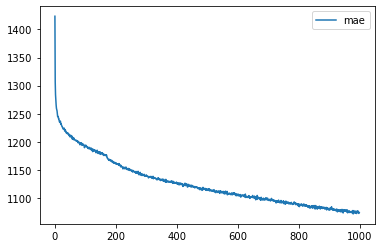

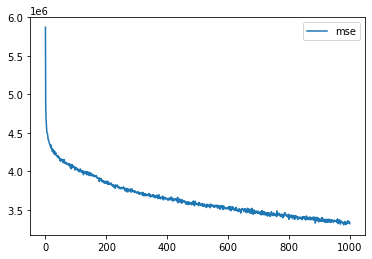

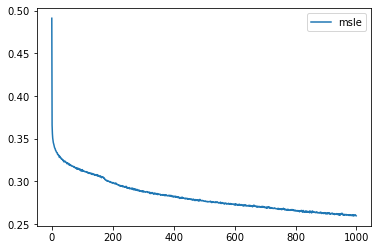

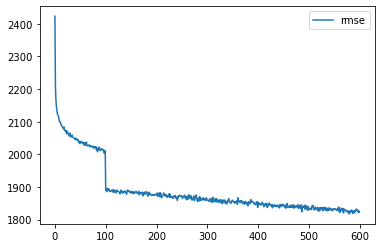

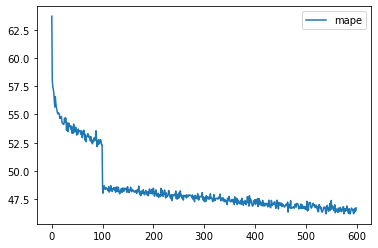

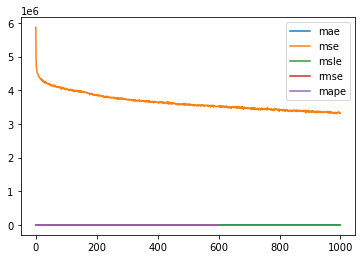

In [11]:
plt.plot(mae_history, label='mae')
plt.legend()
plt.show()

plt.plot(mse_history, label='mse')
plt.legend()
plt.show()

plt.plot(msle_history, label='msle')
plt.legend()
plt.show()

plt.plot(rmse_history, label='rmse')
plt.legend()
plt.show()

plt.plot(mape_history, label='mape')
plt.legend()
plt.show()

plt.plot(mae_history, label='mae')
plt.plot(mse_history, label='mse')
plt.plot(msle_history, label='msle')
plt.plot(rmse_history, label='rmse')
plt.plot(mape_history, label='mape')
plt.legend()
plt.show()